### `Синхронизация потоков`

In [ ]:
# Очереди, модуль queue

from queue import Queue
from threading import Thread

def worker(q, n):
    while True:
        item = q.get()
        if item is None:
            break
        print("preocess data: ", n, item)

q = Queue(5) 
th1 = Thread(target=worker, args=(q, 1)) 
th2 = Thread(target=worker, args=(q, 2))
th1.start(); th2.start()

for i in range(10):
    q.put(i)

q.put(None); q.put(None)
th1.join(); th2.join()

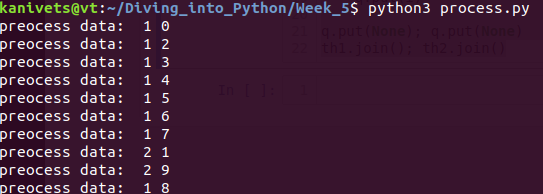

In [2]:
# Синхронизация потоков, блокировки

import threading

class Point(object):
    def __init__(self, x, y):
        self.mutex = threading.RLock()
        self.set(x, y)

    def get(self):
        with self.mutex:
            return (self.x, self.y)

    def set(self, x, y):
        with self.mutex:
            self.x = x
            self.y = y
# use in threads
my_point = Point(10, 20)
my_point.set(15, 10)
my_point.get()

(15, 10)

In [ ]:
# 2)Синхронизация потоков, блокировки

import threading

a = threading.RLock()
b = threading.RLock()
    
    
def foo():
    try: 
        a.acquire()
        b.acquire()
    finally:
        a.release()
        b.release()

In [ ]:
# Синхронизация потоков, условные переменные 

class Queue(object):
    def __init__(self, size=5):
        self._size = size
        self._queue = []
        self._mutex = threading.Rlock()
        self._empty = threading.Codition(self._mutex)
        self._full = threading.Condition(self._mutex)
        
    def put(self, val):
        with self._full:
            while len(self._queue) >= self._size:
                self._full.wait()
                
            self._queue.append(val)
            self._empty.notify()
    def get(self):
        with self._empty:
            while len(self._queue) == 0:
                self._empty.wait()
                
            ret = self._queue.pop(0)
            self._full.nitify()
            return ret